# Libraries

In [1]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import random
import networkx as nx

# Prepocessing

### Working on page names

In [15]:
df_names = pd.read_csv("Names.txt",  names = ["Page_Name"])
df_names['Page_Name'] = df_names['Page_Name'].apply(lambda x : ' '.join(x.split()[1:]))
df_names.head()

,Page_Name
0,Chiasmal syndrome
1,Kleroterion
2,Pinakion
3,LyndonHochschildSerre spectral sequence
4,Zariski's main theorem


### Working on topcast categories

In [4]:
data_cat = pd.read_csv('Categories.txt',sep=';', names = ["Category","PageList"])
data_cat['Category'] = data_cat['Category'].map(lambda x: x.lstrip('Category:').rstrip('aAbBcC'))
data_cat['PageList'] = data_cat['PageList'].map(lambda x: x.split())
data_cat.head()

,Category,PageList
0,Buprestoide,"[301, 302, 303, 304, 305, 306, 307, 308, 309, ..."
1,People_from_Worcester,"[1056, 1057, 1058, 1059, 1060, 60971, 76515, 7..."
2,Skin_conditions_resulting_from_physical_factors,"[971, 973, 1166, 1167, 1168, 1169, 1170, 1171,..."
3,Visual_kei_bands,"[1297, 1300, 1311, 1312, 1313, 1314, 1315, 131..."
4,Japanese_rock_music_groups,"[1297, 1300, 1313, 1314, 1315, 1316, 1319, 132..."


In [5]:
df_article = pd.concat([pd.DataFrame(data = {'Articles': data_cat.loc[i].PageList, 
                                             'Category': data_cat.loc[i].Category}) for i in data_cat.index], 
                       ignore_index=True)

In [6]:
df_article

,Articles,Category
0,301,Buprestoide
1,302,Buprestoide
2,303,Buprestoide
3,304,Buprestoide
4,305,Buprestoide
...,...,...
4759521,1791426,Tachinidae
4759522,1791427,Tachinidae
4759523,1791428,Tachinidae
4759524,1791429,Tachinidae


In [7]:
from tqdm import tqdm
dictionary = {}
for i in tqdm(range(len(df_article))):
    if df_article.loc[i,"Articles"] not in dictionary:
        dictionary[df_article.loc[i,"Articles"]] = []
    dictionary[df_article.loc[i,"Articles"]].append(df_article.loc[i,"Category"])

100%|██████████| 4759526/4759526 [07:20<00:00, 10799.49it/s]


In [8]:
dictionary

{'301': ['Buprestoide'],
 '302': ['Buprestoide'],
 '303': ['Buprestoide', 'Insect_families'],
 '304': ['Buprestoide'],
 '305': ['Buprestoide'],
 '306': ['Buprestoide'],
 '307': ['Buprestoide'],
 '308': ['Buprestoide'],
 '309': ['Buprestoide'],
 '310': ['Buprestoide'],
 '311': ['Buprestoide'],
 '312': ['Buprestoide'],
 '313': ['Buprestoide'],
 '314': ['Buprestoide'],
 '315': ['Buprestoide'],
 '316': ['Buprestoide'],
 '317': ['Buprestoide'],
 '318': ['Buprestoide'],
 '319': ['Buprestoide'],
 '320': ['Buprestoide'],
 '321': ['Buprestoide'],
 '322': ['Buprestoide'],
 '323': ['Buprestoide'],
 '324': ['Buprestoide'],
 '325': ['Buprestoide'],
 '326': ['Buprestoide'],
 '327': ['Buprestoide'],
 '328': ['Buprestoide'],
 '329': ['Buprestoide'],
 '330': ['Buprestoide'],
 '331': ['Buprestoide'],
 '332': ['Buprestoide'],
 '333': ['Buprestoide'],
 '334': ['Buprestoide'],
 '335': ['Buprestoide'],
 '336': ['Buprestoide'],
 '337': ['Buprestoide'],
 '338': ['Buprestoide'],
 '339': ['Buprestoide'],
 '340'

In [12]:
import random 
for keys in dictionary:
    new_value = random.choice(dictionary[keys])
    del dictionary[keys][:]
    dictionary[keys] = new_value

In [13]:
dictionary

{'301': 'Buprestoide',
 '302': 'Buprestoide',
 '303': 'Insect_families',
 '304': 'Buprestoide',
 '305': 'Buprestoide',
 '306': 'Buprestoide',
 '307': 'Buprestoide',
 '308': 'Buprestoide',
 '309': 'Buprestoide',
 '310': 'Buprestoide',
 '311': 'Buprestoide',
 '312': 'Buprestoide',
 '313': 'Buprestoide',
 '314': 'Buprestoide',
 '315': 'Buprestoide',
 '316': 'Buprestoide',
 '317': 'Buprestoide',
 '318': 'Buprestoide',
 '319': 'Buprestoide',
 '320': 'Buprestoide',
 '321': 'Buprestoide',
 '322': 'Buprestoide',
 '323': 'Buprestoide',
 '324': 'Buprestoide',
 '325': 'Buprestoide',
 '326': 'Buprestoide',
 '327': 'Buprestoide',
 '328': 'Buprestoide',
 '329': 'Buprestoide',
 '330': 'Buprestoide',
 '331': 'Buprestoide',
 '332': 'Buprestoide',
 '333': 'Buprestoide',
 '334': 'Buprestoide',
 '335': 'Buprestoide',
 '336': 'Buprestoide',
 '337': 'Buprestoide',
 '338': 'Buprestoide',
 '339': 'Buprestoide',
 '340': 'Buprestoide',
 '341': 'Buprestoide',
 '342': 'Buprestoide',
 '343': 'Buprestoide',
 '344':

In [14]:
reversed_dict = {}
for key, value in dictionary.items():
    reversed_dict.setdefault(value, [])
    reversed_dict[value].append(key)

In [15]:
reversed_dict

{'Buprestoide': ['301',
  '302',
  '304',
  '305',
  '306',
  '307',
  '308',
  '309',
  '310',
  '311',
  '312',
  '313',
  '314',
  '315',
  '316',
  '317',
  '318',
  '319',
  '320',
  '321',
  '322',
  '323',
  '324',
  '325',
  '326',
  '327',
  '328',
  '329',
  '330',
  '331',
  '332',
  '333',
  '334',
  '335',
  '336',
  '337',
  '338',
  '339',
  '340',
  '341',
  '342',
  '343',
  '344',
  '345',
  '346',
  '347',
  '348',
  '349',
  '350',
  '351',
  '352',
  '353',
  '354',
  '355',
  '356',
  '357',
  '358',
  '359',
  '360',
  '361',
  '362',
  '363',
  '364',
  '365',
  '366',
  '367',
  '368',
  '369',
  '370',
  '371',
  '372',
  '373',
  '374',
  '375',
  '376',
  '377',
  '378',
  '379',
  '380',
  '381',
  '382',
  '383',
  '384',
  '385',
  '386',
  '387',
  '388',
  '389',
  '390',
  '391',
  '392',
  '393',
  '394',
  '395',
  '396',
  '397',
  '398',
  '399',
  '400',
  '401',
  '402',
  '403',
  '404',
  '405',
  '406',
  '407',
  '408',
  '409',
  '410',
  '4

In [16]:
new_dat = pd.DataFrame(reversed_dict.items(), columns=['Category', 'PageList'])

In [17]:
new_dat

,Category,PageList
0,Buprestoide,"[301, 302, 304, 305, 306, 307, 308, 309, 310, ..."
1,Insect_families,"[303, 31472, 1696086, 31636, 31215, 428732, 31..."
2,English_engineers,"[1056, 30227, 436683, 1094717, 1094722, 147092..."
3,People_from_Worcester,"[1057, 1060, 60971, 78094, 85767, 95330, 15841..."
4,Alumni_of_Loughborough_University,"[1058, 1481017, 80757, 110807, 501116, 78683, ..."
...,...,...
17351,Populated_places_in_Navarre,"[130269, 1145160, 1358873, 1781142, 1781146, 1..."
17352,Municipalities_of_South_Tyrol,"[215159, 443945, 943609, 1781498, 1781519, 178..."
17353,Suburbs_of_Canberr,"[1781950, 1781953, 1781955, 1781959, 1781960, ..."
17354,Redirects_from_UK_postcode_districts,"[1640637, 1640638, 1788784, 1788785]"


In [11]:
import networkx as nx
G = nx.DiGraph()
G.add_edge(0, 1, weight=1.2)
G.add_edge(3, 4, color="green")
G.add_edges_from([(0, 2, {"color":"blue"}), (2, 3, {"weight":3.1})])

In [12]:
nx.is_directed(G)

True

# [RQ1]

In [4]:
graph = pd.read_csv("wikigraph_reduced.csv", sep='\t', usecols =["0","1"])
graph.columns = ["Source","Target"]
graph.head()

,Source,Target
0,95,1185516
1,108,1059989
2,108,1062426
3,108,1161925
4,134,541222


## Creating the Graph
As a first step we can check if the graph is directed or not.
### Is the graph directed?

 We create a new dataframe where the columns of 'graph' are inverted in order to create the list of edge for both of the dataframe and check in they are equal. In case of a positive answer we can say that the graph is not directed because for each edge from node _a_ to node _b_ there is an edge from node _b_ to node _a_. 

In [272]:
#creating the inverted graph
graph_ = graph.copy()
graph_inverted = graph_[graph_.columns[::-1]] 
graph_inverted.head()

,Target,Source
0,1185516,95
1,1059989,108
2,1062426,108
3,1161925,108
4,541222,134


In [273]:
#converting the dataframes in a list of edges
set_1 = graph.values.tolist()
set_2 = graph_inverted.values.tolist()

In [274]:
#calculating the intersection
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 
intersect = intersection(set_1,set_2)
if (intersect == set_1): # is the intersection equal to list of edge?
    print('The graph is not directed')
else:
    print('The graph is directed')

The graph is directed


The graph is directed since there exists an edge from a certain node _a_ to a node _b_ but not from _b_ to _a_.

Since the graph is directed we can create a DiGraph() object using networkx library.

In [3]:
#empty graph G
G = nx.DiGraph()
sources = list(graph['Source'])  #list of starting node
targets = list(graph['Target'])  #list of ending node


# building G = (V,E)
for i in range(len(graph)):
    if sources[i] not in G.nodes: # if we haven't added the node yet
        G.add_node(sources[i]) #V
    if targets[i] not in G.nodes:
        G.add_node(targets[i]) #V
    G.add_edge(sources[i], targets[i], weight=1) #E


In [5]:
G = nx.DiGraph() #empty directed graph G
sources = list(graph['Source'])#list of starting node
targets = list(graph['Target'])#list of ending node

#building G = (V,E)
for i in range(len(graph)):
    if sources[i] not in G.nodes: # if we haven't added the node yet
        G.add_node(sources[i]) #V
    if targets[i] not in G.nodes:
        G.add_node(targets[i]) #V
    G.add_edge(sources[i], targets[i], weight=1) #E

NameError: name 'graph' is not defined

### How many articles are we considering?

In [21]:
def number_articles(df):
    sources = set(df['Source'])
    targets = set(df['Target'])
    return len(sources.union(targets))

In [22]:
nodes = number_articles(graph)

In [23]:
nodes

98343

### How many hyperlinks between pages exist?

In [24]:
def number_hyperlinks(df):
    return len(df)

In [25]:
edges = len(graph)

### Graph density

In [33]:
def average_links(graph):
    somma = 0
    for node in graph.nodes:
        somma += nx.degree(graph)[node]
    return somma/len(graph.nodes)
        

In [34]:
average_links(G)

9.824674862471147

${\displaystyle D={\frac {|E|}{2{\binom {|V|}{2}}}}={\frac {|E|}{|V|(|V|-1)}}}$

In [28]:
def graph_density(nodes,edges):
    density = edges/(nodes*(nodes-1))
    return density
    

In [29]:
graph_density(nodes,edges) 

4.9951571365597335e-05

Il nostro grafo è a sparse graph whose density D is in the lower range of the density’s codomain, or $0 \leq D < \frac {1} {2}$. Per confermare questo possiamo confrontare il numero di archi massimi per il grafo realizzato rispetto il valore edges calcolato precedentemente.

In [31]:
def comparison_edges(nodes,edges):
    max_edges = nodes*(nodes-1)
    return print("The value of max edges is", max_edges, "while the value of edges is equals", edges)

In [32]:
comparison_edges(nodes,edges)

The value of max edges is 9671247306 while the value of edges is equals 483094


In [55]:
import matplotlib.pyplot as plt
def plot_degree_dist(graph):
    degrees = [graph.degree(node) for node in graph.nodes()]
    plt.hist(degrees, bins=[0, 10, 20, 30, 40, 50, 55,60])
    plt.show()

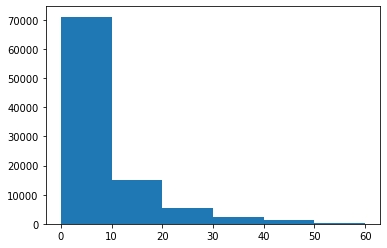

In [56]:
plot_degree_dist(G)

# [RQ2]

We take in input the starting node and the number of clicks $d$, then starting from initial node we reach all the node at level $k$  with $k\leq d$ considering the starting node as level 0. 

In [3]:
def clicks(graph, start_node, depth):
    visited = [start_node] #the starting node is the first visited node
    for i in range(depth): #until level d 
        all_visited =[] # all the node visited
        for node in visited:
            for nbr in graph[node]: #for all the neighborhood  of node
                all_visited.append(nbr)  #save the neighborhood in the list 
        visited = all_visited#saving all the neighborhood     
    return set(all_visited) #returning a set to avoid ripetitions

As an example we can compute all the pages reachable starting from node 95 with 3 clicks:

In [283]:
df_names.iloc[list(clicks(G, 95, 3))]

,Page_Name
1595904,Reba McEntire
1182721,Ma (album)
1061891,Jodie Foster
1067523,Valentine (film)
1060361,Rose McGowan
...,...
1058280,Saw II
1761772,Junior Sanchez
139762,Savion Glover
1061882,Sharon Stone
